<a href="https://colab.research.google.com/github/tasosnikitakis/PyTorch_Tutorial/blob/main/PyTorch_Neural_Netowrk_PtII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

Class creation that inherits the PyTorch nn module

In [2]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x







In [3]:
# pick a seed for randomization
torch.manual_seed(41)
# Model instance creation
model = Model()

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [5]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
my_df = pd.read_csv(url)

In [6]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Change "species" column from string to integer in order to work with the model

In [7]:
my_df["species"] = my_df["species"].replace("setosa", 0.0)
my_df["species"] = my_df["species"].replace("versicolor", 1.0)
my_df["species"] = my_df["species"].replace("virginica", 2.0)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Train Test Split! Set X, y

In [8]:
# Train Test Split!  Set X, y
X = my_df.drop("species", axis=1)
y = my_df["species"]

In [9]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: species, Length: 150, dtype: float64

Convert X and y to Numpy arrays

In [11]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [12]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

Create train and test set using Sklearn

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

Convert Numpy arrays to tensor in order to work with PyTorch

In [16]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

Set the loss function criterion

In [17]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()

Set the optimizer and learning rate. We will choose the popular Adam optimizer. The initial learning rate lr will be 0.01 if the accruacy of the model does not improve after several epochs then we could consider lowering the learning rate

In [18]:
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [19]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

Model training

In [20]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  #go forward and make a prediction
  y_pred = model.forward(X_train)
  #measure the loss of using the loss function:
  loss = criterion(y_pred, y_train)
  #keep track of the losses
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i%10 == 0:
    print(f"Epoch: {i}, loss: {loss}")

  #Do back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




Epoch: 0, loss: 1.1251550912857056
Epoch: 10, loss: 1.0096259117126465
Epoch: 20, loss: 0.8157405853271484
Epoch: 30, loss: 0.5857064127922058
Epoch: 40, loss: 0.3999636769294739
Epoch: 50, loss: 0.267688125371933
Epoch: 60, loss: 0.17942370474338531
Epoch: 70, loss: 0.12151696532964706
Epoch: 80, loss: 0.08601188659667969
Epoch: 90, loss: 0.06520851701498032


Create loss graph

Text(0.5, 0, 'Epoch')

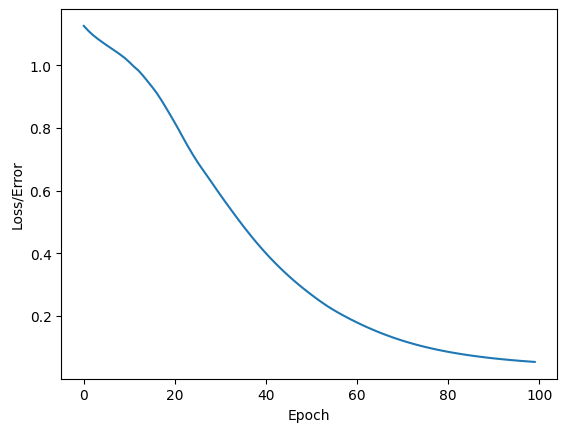

In [21]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss/Error")
plt.xlabel("Epoch")

In [22]:
with torch.no_grad(): # turn of backpropagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [23]:
loss

tensor(0.1315)

In [24]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'



    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-5.8760,  4.4628,  6.5124]) 	 2 	 2
2.)  tensor([-7.5436,  4.1670,  9.7255]) 	 2 	 2
3.)  tensor([-8.4504,  5.1271, 10.1987]) 	 2 	 2
4.)  tensor([-4.3398,  5.6267,  2.5608]) 	 1 	 1
5.)  tensor([-7.1825,  4.8754,  8.2992]) 	 2 	 2
6.)  tensor([-3.3974,  5.3463,  1.2803]) 	 1 	 1
7.)  tensor([-5.9231,  4.9822,  5.9997]) 	 2 	 2
8.)  tensor([-4.2881,  5.7003,  2.3889]) 	 1 	 1
9.)  tensor([-6.5356,  4.9257,  7.1260]) 	 2 	 2
10.)  tensor([-8.0509,  4.4129, 10.3286]) 	 2 	 2
11.)  tensor([-5.6762,  4.9500,  5.6215]) 	 2 	 2
12.)  tensor([ 4.5662, -2.2476, -2.8911]) 	 0 	 0
13.)  tensor([ 4.2571, -1.9967, -2.7330]) 	 0 	 0
14.)  tensor([-2.1108,  4.0515,  0.5799]) 	 1 	 1
15.)  tensor([ 3.4575, -1.2098, -2.3514]) 	 0 	 0
16.)  tensor([-5.4724,  5.1165,  5.0934]) 	 2 	 1
17.)  tensor([ 4.0557, -1.7949, -2.6492]) 	 0 	 0
18.)  tensor([-5.8075,  4.6053,  6.2458]) 	 1 	 2
19.)  tensor([ 4.4343, -2.1392, -2.8242]) 	 0 	 0
20.)  tensor([ 3.4527, -1.2514, -2.3660]) 	 0 	 0
21.)  ten

In [25]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [26]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5365, -2.2383, -2.8684])


In [27]:
# Save our NN Model
torch.save(model.state_dict(), 'iris_model.pt')

In [28]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [29]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [30]:
with torch.no_grad():
  print(new_model(new_iris))

tensor([ 4.5365, -2.2383, -2.8684])
